# Random Forest

## Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Set working directory
month_file = '5_September'
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file+"/Ending Balances/Per_Player")

## Top Players

In [12]:
# Filter Columns
filter = ['gender', 'age_gen', 'day', 'timeofday', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance',  'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']


# Load dataset
dataset = pd.read_parquet('top_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3, 4, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 25:] = sc.fit_transform(X_train[:, 25:])
X_test[:, 25:] = sc.transform(X_test[:, 25:])

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[149 103]
 [ 88 310]]
Accuracy:  0.7061538461538461
Precision:  0.6896486549994381
Recall:  0.6850821568158252
F1 Score:  0.6869476195159099


### Which IDVs have the most weight in the model

In [13]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'day', 3: 'timeofday', 4: 'first_outcome', 5: 'first_wager', 6: 'first_p/b', 7: 'last_outcome', 8: 'last_wager', 9: 'last_p/b', 10: 'beginning_amt', 11: 'ending_amt', 12: 'ending_balance', 13: 'ave_slotdenom', 14: 'std_slotdenom', 15: 'min_slotdenom', 16: 'max_slotdenom', 17: 'ave_theo_payback', 18: 'min_theo_payback', 19: 'max_theo_payback', 20: 'ave_wageramt', 21: 'std_wageramt', 22: 'min_wager', 23: 'max_wager', 24: 'ave_p/b', 25: 'std_p/b', 26: 'max_p/b', 27: 'max_profit', 28: 'depletion_slope', 29: '#inc_slotdenom', 30: '#dec_slotdenom', 31: '#inc_maxbet', 32: '#dec_maxbet', 33: '#W', 34: '#L', 35: '#NH', 36: '#D', 37: '#2ws', 38: '#3ws', 39: '#4ws', 40: 'w/min', 41: 'l/min', 42: '2ws/min', 43: '3ws/min', 44: '4ws/min', 45: 'nh/min', 46: 'd/min', 47: 'w/g', 48: 'l/g', 49: 'nh/g', 50: 'd/g', 51: 'ave_time_per_gamble', 52: 'min_time_per_gamble', 53: 'max_time_per_gamble', 54: 'machines_changes', 55: 'unique_machines', 56: 'ave_time_per_machine', 57: 't

In [14]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x51: 0.05837504813246051
remainder__x46: 0.030612244897959162
remainder__x41: 0.026530612244897944
encoder__x3_night: 0.023142087023488633
remainder__x53: 0.02291105121293797
remainder__x34: 0.020023103581055045
remainder__x57: 0.019368502117828246
remainder__x40: 0.01821332306507507
remainder__x27: 0.015633423180592975
encoder__x3_afternoon: 0.013477088948787064
remainder__x54: 0.012129380053908335
remainder__x56: 0.012013862148633014
encoder__x3_morning: 0.010974201001155148
remainder__x47: 0.010820177127454722
remainder__x21: 0.010512129380053881
remainder__x35: 0.01028109356950323
remainder__x42: 0.010242587601078157
remainder__x50: 0.010088563727377719
remainder__x25: 0.009934539853677283
remainder__x43: 0.009472468232576026
remainder__x28: 0.008971890643049618
remainder__x33: 0.00831728917982284
remainder__x11: 0.008278783211397755
remainder__x14: 0.008124759337697341
remainder__x20: 0.008047747400847105
remainder__x37: 0.007932229495571786
remainder__x12: 0.0074316519

## Cumulative Accuracy Profile (CAP) Graph

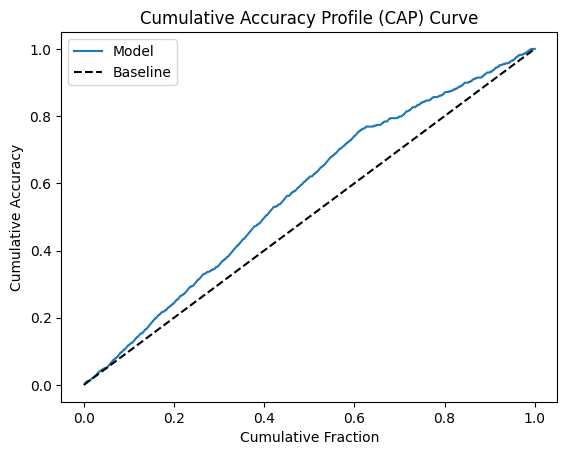

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()

## Bottom Players

In [9]:
# Filter Columns
filter = ['gender', 'age_gen', 'day', 'timeofday', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance',  'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']


# Load dataset
dataset = pd.read_parquet('ntop_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3, 4, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 25:] = sc.fit_transform(X_train[:, 25:])
X_test[:, 25:] = sc.transform(X_test[:, 25:])

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[1887  127]
 [ 460  168]]
Accuracy:  0.7778198334595003
Precision:  0.6867483191669135
Recall:  0.6022286668479877
F1 Score:  0.6147140901961964


In [10]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'day', 3: 'timeofday', 4: 'first_outcome', 5: 'first_wager', 6: 'first_p/b', 7: 'last_outcome', 8: 'last_wager', 9: 'last_p/b', 10: 'beginning_amt', 11: 'ending_amt', 12: 'ending_balance', 13: 'ave_slotdenom', 14: 'std_slotdenom', 15: 'min_slotdenom', 16: 'max_slotdenom', 17: 'ave_theo_payback', 18: 'min_theo_payback', 19: 'max_theo_payback', 20: 'ave_wageramt', 21: 'std_wageramt', 22: 'min_wager', 23: 'max_wager', 24: 'ave_p/b', 25: 'std_p/b', 26: 'max_p/b', 27: 'max_profit', 28: 'depletion_slope', 29: '#inc_slotdenom', 30: '#dec_slotdenom', 31: '#inc_maxbet', 32: '#dec_maxbet', 33: '#W', 34: '#L', 35: '#NH', 36: '#D', 37: '#2ws', 38: '#3ws', 39: '#4ws', 40: 'w/min', 41: 'l/min', 42: '2ws/min', 43: '3ws/min', 44: '4ws/min', 45: 'nh/min', 46: 'd/min', 47: 'w/g', 48: 'l/g', 49: 'nh/g', 50: 'd/g', 51: 'ave_time_per_gamble', 52: 'min_time_per_gamble', 53: 'max_time_per_gamble', 54: 'machines_changes', 55: 'unique_machines', 56: 'ave_time_per_machine', 57: 't

In [11]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x41: 0.052891623284429735
remainder__x10: 0.043871273071462394
remainder__x27: 0.03881684808329392
remainder__x51: 0.03801230477993376
encoder__x3_night: 0.03357311878845245
remainder__x53: 0.0328064363464269
remainder__x40: 0.03044959772834832
remainder__x11: 0.02534784666351164
remainder__x49: 0.022479886417416006
remainder__x35: 0.022423095125414128
remainder__x26: 0.020662565073355444
remainder__x42: 0.020208234737340302
remainder__x46: 0.019848556554661632
remainder__x25: 0.019782300047326108
remainder__x57: 0.0197633696166588
remainder__x48: 0.01816374822527215
remainder__x12: 0.017349739706578337
remainder__x28: 0.017311878845243756
remainder__x45: 0.016469474680549
remainder__x24: 0.016015144344533883
remainder__x21: 0.015078088026502623
remainder__x34: 0.014973970657832491
remainder__x47: 0.01469001419782301
remainder__x17: 0.014604827259820197
remainder__x33: 0.014519640321817351
remainder__x5: 0.014396592522479901
remainder__x50: 0.013525792711784224
remainder__x2

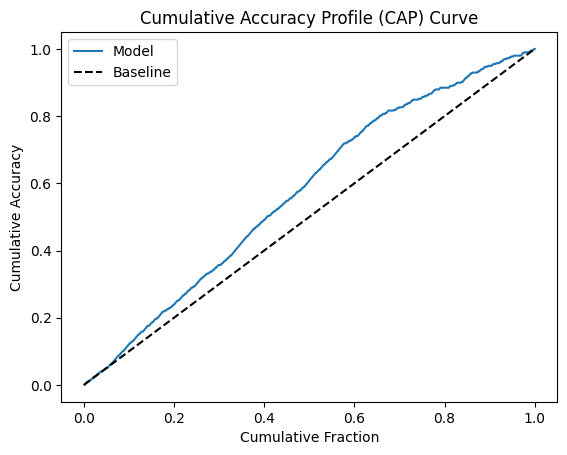

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()